#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix
from collections import Counter
from statistics import mean
sns.set_style('darkgrid')

#Import File CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Semester 5/Machine Learning/UTS/wine.csv')

#Data Cleaning

#### Data yang memiliki nilai nol

In [ ]:
dataset.isnull().sum()

wine_class              0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
OD280_or_OD315          0
proline                 0
dtype: int64

#### Duplikasi Data

In [ ]:
duplicate_rows = dataset[dataset.duplicated()]

# Menampilkan baris-baris yang merupakan duplikasi
print("Duplikasi Data:")
print(duplicate_rows)

# Menampilkan jumlah duplikasi
print("Jumlah Duplikasi:", len(duplicate_rows))

#### Type data

In [ ]:
dataset.dtypes

wine_class                int64
alcohol                 float64
malic_acid              float64
ash                     float64
alcalinity_of_ash       float64
magnesium                 int64
total_phenols           float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color_intensity         float64
hue                     float64
OD280_or_OD315          float64
proline                   int64
dtype: object

#### Encoding Data

In [ ]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
dataset['wine_class'] = pd.cut(x = dataset['wine_class'], bins = bins, labels = labels)

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dataset['wine_class'] = labelencoder_y.fit_transform(dataset['wine_class'])

dataset.head()

,wine_class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_or_OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Normalisasi Data dgn Min-Max

In [ ]:
#MinMaxScaler
scaler = MinMaxScaler()

# Analisis Korelasi

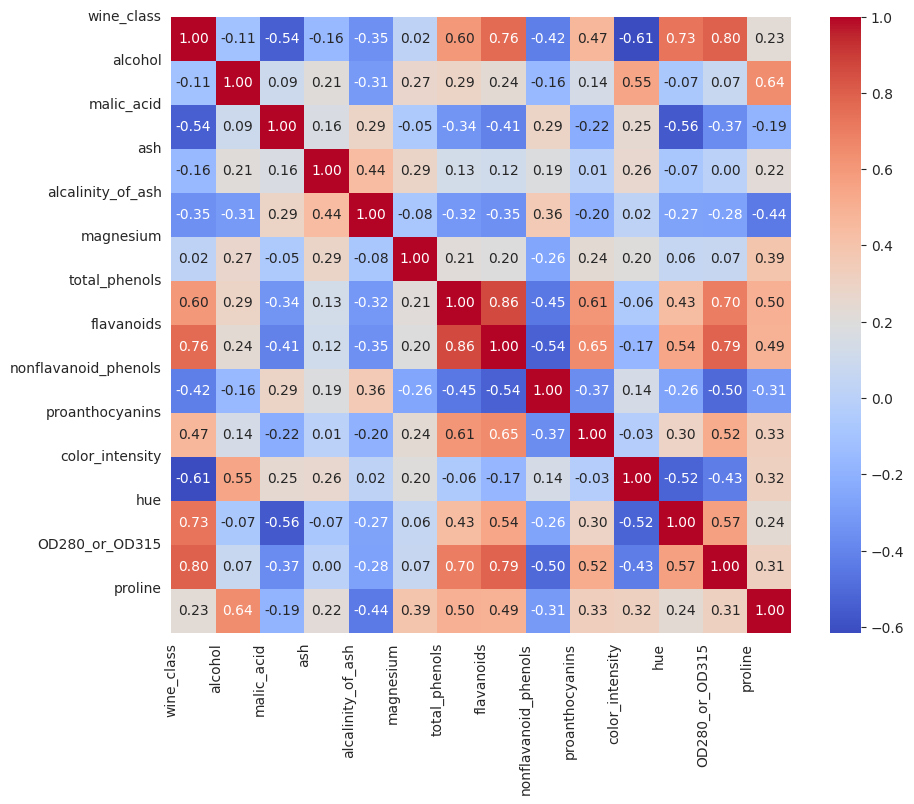

In [ ]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10, 8))
# Generate Heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

# **OD280_or_OD315 dan flavanoids**

In [ ]:
#Selected Features
selected_atr = ['OD280_or_OD315', 'flavanoids']
X = dataset[selected_atr]
y = dataset['wine_class']

In [ ]:
X_normalized = scaler.fit_transform(X)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [ ]:
k_fold = 5
cv = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

# Tampilkan hasil akurasi dari setiap fold
for i, score in enumerate(scores):
    print(f'Fold {i+1}: {score}')

Fold 1: 1.0
Fold 2: 0.9444444444444444
Fold 3: 0.8611111111111112
Fold 4: 0.9428571428571428
Fold 5: 0.9714285714285714


In [ ]:
#Menampilkan rata-rata akurasi dari semua fold
print(f'Rata-rata Akurasi: {scores.mean()}')

Rata-rata Akurasi: 0.943968253968254


In [ ]:
all_conf_matrices = []

# Loop melalui setiap fold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Prediksi menggunakan data uji
    y_pred = model.predict(X_test)

    # Hitung confusion matrix untuk fold ini
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Simpan confusion matrix ke dalam array
    all_conf_matrices.append(conf_matrix)

# Tampilkan confusion matrix untuk setiap fold
for i, conf_matrix in enumerate(all_conf_matrices):
    print(f"Confusion Matrix - Fold {i+1}:")
    print(conf_matrix)

Confusion Matrix - Fold 1:
[[10  0]
 [ 2 24]]
Confusion Matrix - Fold 2:
[[10  0]
 [ 2 24]]
Confusion Matrix - Fold 3:
[[10  0]
 [ 1 25]]
Confusion Matrix - Fold 4:
[[ 9  0]
 [ 1 25]]
Confusion Matrix - Fold 5:
[[ 8  1]
 [ 1 25]]


In [ ]:
train_times = []
for train_index, _ in cv.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]

    # Mengukur waktu train untuk setiap fold
    train_time = timeit.timeit(lambda: model.fit(X_train, y_train), number=1)
    train_times.append(train_time)

# Cetak durasi train untuk setiap fold
for i, time in enumerate(train_times):
    print(f'Durasi train untuk fold {i+1}: {time} detik')

#Menampilkan rata-rata durasi dari semua fold
avg_train_tm = mean(train_times)
print(f'Rata-rata durasi: {avg_train_tm} detik')

Durasi train untuk fold 1: 0.003959299999905852 detik
Durasi train untuk fold 2: 0.004413957999986451 detik
Durasi train untuk fold 3: 0.0025509520000923658 detik
Durasi train untuk fold 4: 0.0018884219998653862 detik
Durasi train untuk fold 5: 0.0018090920000304322 detik
Rata-rata durasi: 0.0029243447999760972 detik


# **Flavanoid dan total phenols**

In [ ]:
#Selected Features
selected_atr = ['total_phenols', 'flavanoids']
X = dataset[selected_atr]
y = dataset['wine_class']

In [ ]:
X_normalized = scaler.fit_transform(X)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()

In [ ]:
k_fold = 5
scores = cross_val_score(model2, X, y, cv=k_fold, scoring='accuracy')

# Tampilkan hasil akurasi dari setiap fold
for i, score in enumerate(scores):
    print(f'Fold {i+1}: {score}')

Fold 1: 1.0
Fold 2: 1.0
Fold 3: 0.75
Fold 4: 0.8571428571428571
Fold 5: 0.9714285714285714


In [ ]:
# Tampilkan rata-rata akurasi dari semua fold
print(f'Rata-rata Akurasi: {scores.mean()}')

Rata-rata Akurasi: 0.9157142857142857


In [ ]:
all_conf_matrices = []

# Loop melalui setiap fold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Prediksi menggunakan data uji
    y_pred = model.predict(X_test)

    # Hitung confusion matrix untuk fold ini
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Simpan confusion matrix ke dalam array
    all_conf_matrices.append(conf_matrix)

# Tampilkan confusion matrix untuk setiap fold
for i, conf_matrix in enumerate(all_conf_matrices):
    print(f"Confusion Matrix - Fold {i+1}:")
    print(conf_matrix)

Confusion Matrix - Fold 1:
[[ 9  1]
 [ 1 25]]
Confusion Matrix - Fold 2:
[[ 9  1]
 [ 3 23]]
Confusion Matrix - Fold 3:
[[ 9  1]
 [ 1 25]]
Confusion Matrix - Fold 4:
[[ 8  1]
 [ 3 23]]
Confusion Matrix - Fold 5:
[[ 9  0]
 [ 3 23]]


In [ ]:
train_times = []
for train_index, _ in cv.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]

    # Mengukur waktu train untuk setiap fold
    train_time = timeit.timeit(lambda: model.fit(X_train, y_train), number=1)
    train_times.append(train_time)

# Cetak durasi train untuk setiap fold
for i, time in enumerate(train_times):
    print(f'Durasi train untuk fold {i+1}: {time} detik')

#Menampilkan rata-rata durasi dari semua fold
avg_train_tm = mean(train_times)
print(f'Rata-rata durasi: {avg_train_tm} detik')

Durasi train untuk fold 1: 0.002915692999977182 detik
Durasi train untuk fold 2: 0.0051690200000393816 detik
Durasi train untuk fold 3: 0.0029081679999762855 detik
Durasi train untuk fold 4: 0.002592601000060313 detik
Durasi train untuk fold 5: 0.009526821999997992 detik
Rata-rata durasi: 0.004622460800010231 detik


# **OD280_or_OD315 dan total phenols**

In [ ]:
selected_atr = ['total_phenols', 'OD280_or_OD315']
X = dataset[selected_atr]
y = dataset['wine_class']

In [ ]:
X_normalized = scaler.fit_transform(X)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model3 = GaussianNB()

In [ ]:
k_fold = 5
scores = cross_val_score(model3, X, y, cv=k_fold, scoring='accuracy')

# Tampilkan hasil akurasi dari setiap fold
for i, score in enumerate(scores):
    print(f'Fold {i+1}: {score}')

Fold 1: 0.9722222222222222
Fold 2: 0.9166666666666666
Fold 3: 0.7777777777777778
Fold 4: 0.8571428571428571
Fold 5: 0.9714285714285714


In [ ]:
# Tampilkan rata-rata akurasi dari semua fold
print(f'Rata-rata Akurasi: {scores.mean()}')

Rata-rata Akurasi: 0.8990476190476191


In [ ]:
all_conf_matrices = []

# Loop melalui setiap fold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Prediksi menggunakan data uji
    y_pred = model.predict(X_test)

    # Hitung confusion matrix untuk fold ini
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Simpan confusion matrix ke dalam array
    all_conf_matrices.append(conf_matrix)

# Tampilkan confusion matrix untuk setiap fold
for i, conf_matrix in enumerate(all_conf_matrices):
    print(f"Confusion Matrix - Fold {i+1}:")
    print(conf_matrix)

Confusion Matrix - Fold 1:
[[ 9  1]
 [ 2 24]]
Confusion Matrix - Fold 2:
[[ 9  1]
 [ 5 21]]
Confusion Matrix - Fold 3:
[[10  0]
 [ 1 25]]
Confusion Matrix - Fold 4:
[[ 7  2]
 [ 1 25]]
Confusion Matrix - Fold 5:
[[ 8  1]
 [ 0 26]]


In [ ]:
train_times = []
for train_index, _ in cv.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]

    # Mengukur waktu train untuk setiap fold
    train_time = timeit.timeit(lambda: model.fit(X_train, y_train), number=1)
    train_times.append(train_time)

# Cetak durasi train untuk setiap fold
for i, time in enumerate(train_times):
    print(f'Durasi train untuk fold {i+1}: {time} detik')

#Menampilkan rata-rata durasi dari semua fold
avg_train_tm = mean(train_times)
print(f'Rata-rata durasi: {avg_train_tm} detik')

Durasi train untuk fold 1: 0.002839786000095046 detik
Durasi train untuk fold 2: 0.007204196999964552 detik
Durasi train untuk fold 3: 0.003575408999950014 detik
Durasi train untuk fold 4: 0.004763259999890579 detik
Durasi train untuk fold 5: 0.0026707960000749154 detik
Rata-rata durasi: 0.004210689599995021 detik


# **OD280_or_0D315, total phenols, flavanoids**



In [ ]:
selected_atr = ['OD280_or_OD315', 'total_phenols', 'flavanoids']
X = dataset[selected_atr]
y = dataset['wine_class']

In [ ]:
X_normalized = scaler.fit_transform(X)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()

In [ ]:
k_fold = 5
scores = cross_val_score(model4, X, y, cv=k_fold, scoring='accuracy')

# Tampilkan hasil akurasi dari seti ap fold
for i, score in enumerate(scores):
    print(f'Fold {i+1}: {score}')

Fold 1: 1.0
Fold 2: 0.9722222222222222
Fold 3: 0.8611111111111112
Fold 4: 0.8857142857142857
Fold 5: 0.9714285714285714


In [ ]:
# Tampilkan rata-rata akurasi dari semua fold
print(f'Rata-rata Akurasi: {scores.mean()}')

Rata-rata Akurasi: 0.9380952380952381


In [ ]:
all_conf_matrices = []

# Loop melalui setiap fold
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Latih model pada data latih
    model.fit(X_train, y_train)

    # Prediksi menggunakan data uji
    y_pred = model.predict(X_test)

    # Hitung confusion matrix untuk fold ini
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Simpan confusion matrix ke dalam array
    all_conf_matrices.append(conf_matrix)

# Tampilkan confusion matrix untuk setiap fold
for i, conf_matrix in enumerate(all_conf_matrices):
    print(f"Confusion Matrix - Fold {i+1}:")
    print(conf_matrix)

Confusion Matrix - Fold 1:
[[ 9  1]
 [ 2 24]]
Confusion Matrix - Fold 2:
[[10  0]
 [ 3 23]]
Confusion Matrix - Fold 3:
[[10  0]
 [ 1 25]]
Confusion Matrix - Fold 4:
[[ 9  0]
 [ 1 25]]
Confusion Matrix - Fold 5:
[[ 9  0]
 [ 1 25]]


In [ ]:
train_times = []
for train_index, _ in cv.split(X, y):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]

    # Mengukur waktu train untuk setiap fold
    train_time = timeit.timeit(lambda: model.fit(X_train, y_train), number=1)
    train_times.append(train_time)

# Cetak durasi train untuk setiap fold
for i, time in enumerate(train_times):
    print(f'Durasi train untuk fold {i+1}: {time} detik')

#Menampilkan rata-rata durasi dari semua fold
avg_train_tm = mean(train_times)
print(f'Rata-rata durasi: {avg_train_tm} detik')

Durasi train untuk fold 1: 0.0035974059999261954 detik
Durasi train untuk fold 2: 0.0031054539999786357 detik
Durasi train untuk fold 3: 0.0032967089998692245 detik
Durasi train untuk fold 4: 0.002184768000006443 detik
Durasi train untuk fold 5: 0.001807303000077809 detik
Rata-rata durasi: 0.0027983279999716617 detik


# **Test pake data baru**

In [ ]:
import pickle

In [ ]:
pkl_filename = "/content/drive/MyDrive/Semester 5/Machine Learning/UTS/model_final.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model4, file)

In [ ]:
pkl_filename = "/content/drive/MyDrive/Semester 5/Machine Learning/UTS/model_final.pkl"
with open(pkl_filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
dt_new = pd.read_csv('/content/drive/MyDrive/Semester 5/Machine Learning/UTS/wine_neww.csv')

In [ ]:
dt_new.head()

,OD280_or_OD315,total_phenols,flavanoids
0,3.92,2.80,3.29
1,1.60,2.60,2.68
2,2.70,2.30,3.56
3,3.10,1.83,2.63
4,1.20,1.65,3.00


In [ ]:
X_new = dt_new[['OD280_or_OD315', 'total_phenols', 'flavanoids']].values
X_new

array([[3.92, 2.8 , 3.29],
       [1.6 , 2.6 , 2.68],
       [2.7 , 2.3 , 3.56],
       [3.1 , 1.83, 2.63],
       [1.2 , 1.65, 3.  ],
       [1.6 , 1.39, 2.65],
       [2.2 , 1.35, 3.17],
       [2.85, 1.28, 3.39],
       [3.55, 1.7 , 2.92],
       [3.17, 1.48, 3.54],
       [2.82, 1.55, 3.27],
       [2.9 , 1.98, 2.99],
       [2.73, 1.25, 3.74],
       [3.  , 1.39, 2.79],
       [2.11, 1.68, 2.9 ]])

In [ ]:
model4.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_new_pred = model4.predict(X_new)
print(y_new_pred)

[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
